# Multivariate Linear Regression

# step 1 :

Importing the Dataset 

In [21]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline
my_data = pd.read_excel("energy_data.xlsx")
print(my_data.head(5))

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


AT = Temp
V = Vaccum
P = Pressure
RH = Humidity
PE = Energy Input

# Step 2. Normalize the data:

In [22]:
# we need to normalize the features using mean normalization
my_data = (my_data - my_data.mean()) / my_data.std()
my_data.head()

,AT,V,AP,RH,PE
0,-0.629486,-0.987245,1.820393,-0.009519,0.521181
1,0.741870,0.681010,1.141803,-0.974570,-0.585634
2,-1.951195,-1.172956,-0.185068,1.289772,2.003574
3,0.162197,0.237191,-0.508366,0.228148,-0.462003
4,-1.185007,-1.322470,-0.678435,1.596616,1.144606


# Step 3. Create matrices and set hyperparameters:

In [23]:
# setting the matrixes
X = my_data.iloc[:, 0:2]
ones = np.ones([X.shape[0], 1])
X = np.concatenate((ones, X), axis=1)

y = my_data.iloc[
    :, 2:3
].values  # .values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1, 3])

# set hyper parameters
alpha = 0.01
iters = 1000

This should be pretty routine by now. We assign the first two columns as a matrix to X. Then we concatenate an array of ones to X. We assign the third column to y.

Finally, we set up the hyperparameters and initialize theta as an array of zeros.

# Step 4. Create the cost function:

In [24]:
# computecost
def computeCost(X, y, theta):
    tobesummed = np.power(((X @ theta.T) - y), 2)
    return np.sum(tobesummed) / (2 * len(X))

# Step 5. Create the Gradient Descent function:

In [25]:
# gradient descent
def gradientDescent(X, y, theta, iters, alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha / len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)

    return theta, cost


# running the gd and cost function
g, cost = gradientDescent(X, y, theta, iters, alpha)
print(g)

finalCost = computeCost(X, y, g)
print(finalCost)

[[-4.76757476e-13 -4.87981740e-01 -1.14749741e-02]]
0.3713970113203531


In [26]:
g, cost = gradientDescent(X, y, theta, iters, alpha)
print(
    g
)  # [[ -1.03191687e-16   8.78503652e-01  -4.69166570e-02]]finalCost = computeCost(X,y,g)
print(finalCost)  # 0.13070336960771892

[[-4.76757476e-13 -4.87981740e-01 -1.14749741e-02]]
0.3713970113203531


# Step 6. The cost plot:

Text(0.5, 1.0, 'Error vs. Training Epoch')

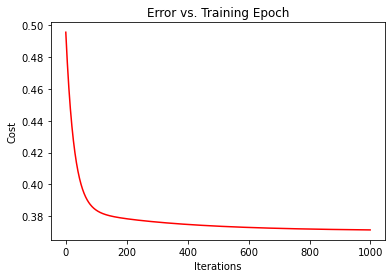

In [27]:
# plot the cost
fig, ax = plt.subplots()
ax.plot(np.arange(iters), cost, "r")
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Error vs. Training Epoch")